In [1]:
pip install qiskit
































[notice] A new release of pip available: 23.1.1 -> 23.1.2

[notice] To update, run: pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


Encrypted Message:

Decrypted Message:


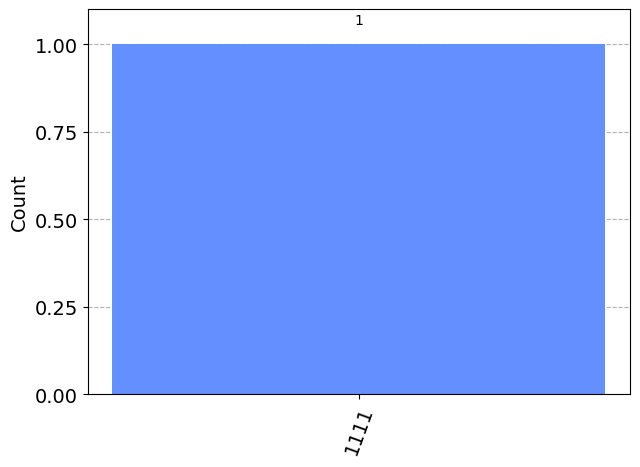

In [2]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram

# Encrypt a message using a quantum circuit
def encrypt_message(message, key):
    # Determine the number of qubits needed
    num_qubits = len(key) + len(message)

    # Create a quantum circuit with the necessary qubits and classical bits
    qc = QuantumCircuit(num_qubits, len(key))

    # Apply gates based on the key to encrypt the message
    for i, bit in enumerate(key):
        if bit == '1':
            qc.x(i)

    # Apply controlled-X gates to encrypt the message
    for i, bit in enumerate(message):
        if bit == '1':
            qc.cx(i + len(key), i)

    # Measure the encrypted message
    qc.measure(list(range(len(key), len(key) + len(message))), list(range(len(message))))

    return qc
def decrypt_message(encrypted_message, key):
    # Create a quantum circuit with the necessary qubits and classical bits
    qc = QuantumCircuit(len(key) + len(encrypted_message), len(key))

    # Apply gates based on the key to decrypt the message
    for i, bit in enumerate(key):
        if bit == '1':
            qc.x(i)

    # Apply controlled-X gates to decrypt the message
    for i, bit in enumerate(encrypted_message):
        if bit == '1':
            qc.cx(i, i + len(key))

    # Measure the decrypted message
    qc.measure(list(range(len(key))), list(range(len(key))))

    return qc

message = "1010"
key = "1111"

# Encrypt the message
encrypted_circuit = encrypt_message(message, key)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(encrypted_circuit, simulator, shots=1)
result = job.result()
encrypted_counts = result.get_counts(encrypted_circuit)

print("Encrypted Message:")
plot_histogram(encrypted_counts)

# Decrypt the encrypted message
decrypted_circuit = decrypt_message(list(encrypted_counts.keys())[0], key)

# Simulate the quantum circuit
job = execute(decrypted_circuit, simulator, shots=1)
result = job.result()
decrypted_counts = result.get_counts(decrypted_circuit)

print("Decrypted Message:")
plot_histogram(decrypted_counts)

Decrypted Message:


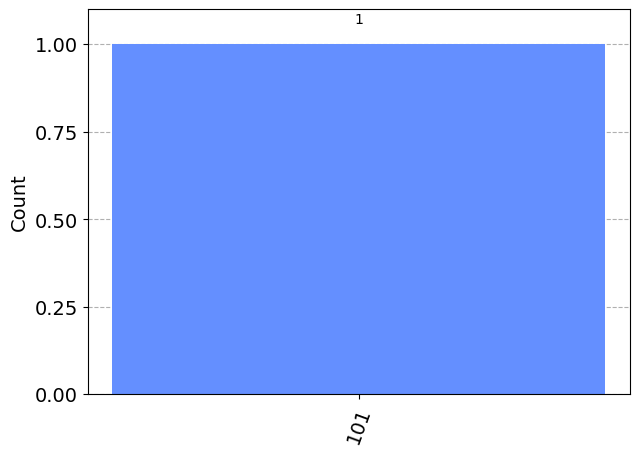

In [3]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram

def break_classical_encryption(ciphertext, key):
    # Create a quantum circuit with the necessary qubits and classical bits
    qc = QuantumCircuit(len(ciphertext) + len(key), len(key))

    # Apply gates based on the key to decrypt the ciphertext
    for i, bit in enumerate(key):
        if bit == '1':
            qc.x(i)

    # Apply controlled-X gates to decrypt the ciphertext
    for i, bit in enumerate(ciphertext):
        if bit == '1':
            target_qubit = i + len(key)
            qc.cx(target_qubit, i)

    # Measure the decrypted message
    qc.measure(list(range(len(key))), list(range(len(key))))

    return qc



# Example usage
ciphertext = "1101"
key = "101"

# Break the classical encryption
break_circuit = break_classical_encryption(ciphertext, key)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(break_circuit, simulator, shots=1)
result = job.result()
break_counts = result.get_counts(break_circuit)

print("Decrypted Message:")
plot_histogram(break_counts)


Encrypted Message:


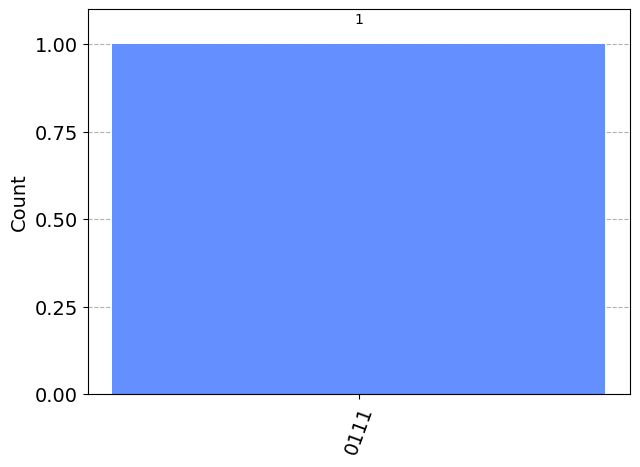

In [4]:
# Quantum circuit for quantum-safe cryptography
def quantum_safe_cryptography(message, key):
    # Create a quantum circuit with the necessary qubits and classical bits
    qc = QuantumCircuit(len(message), len(key))

    # Apply gates based on the key to encrypt the message
    for i, bit in enumerate(key):
        if bit == '1':
            qc.x(i)
    
    # Apply gates to the message for quantum-safe encryption
    for i, bit in enumerate(message):
        if bit == '1':
            qc.h(i)
    
    # Measure the encrypted message
    qc.measure(list(range(len(key))), list(range(len(key))))

    return qc

# Example usage
message = "1101"
key = "1110"

# Perform quantum-safe cryptography
crypto_circuit = quantum_safe_cryptography(message, key)

# Simulate the quantum circuit
job = execute(crypto_circuit, simulator, shots=1)
result = job.result()
crypto_counts = result.get_counts(crypto_circuit)

print("Encrypted Message:")
plot_histogram(crypto_counts)

In [5]:
from qiskit import QuantumCircuit, execute, Aer

# Define the number of qubits
qubit_count = 3

# Define the simulator backend
simulator = Aer.get_backend('qasm_simulator')

# Create a quantum circuit with the required qubit count
qc = QuantumCircuit(qubit_count)

# Perform quantum computations
# ...

# Example: Quantum teleportation
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()

# Simulate the quantum circuit
job = execute(qc, simulator, shots=1)
result = job.result()
counts = result.get_counts(qc)

print("Result:", counts)

Result: {'111': 1}


In [6]:
!pip install qiskit-ignis



  Using cached qiskit_ignis-0.7.1-py3-none-any.whl (198 kB)





















[notice] A new release of pip available: 23.1.1 -> 23.1.2

[notice] To update, run: pip install --upgrade pip


In [7]:
pip install qiskit-aer


















[notice] A new release of pip available: 23.1.1 -> 23.1.2

[notice] To update, run: pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


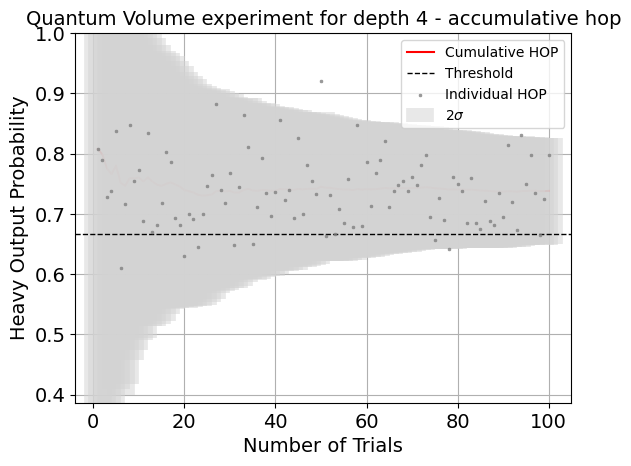

AnalysisResult

- name: mean_HOP

- value: 0.74+/-0.04

- quality: bad

- extra: <4 items>

- device_components: ['Q0', 'Q1', 'Q2', 'Q3']

- verified: False

AnalysisResult

- name: quantum_volume

- value: 1

- quality: bad

- extra: <4 items>

- device_components: ['Q0', 'Q1', 'Q2', 'Q3']

- verified: False


In [15]:

from qiskit import Aer, transpile, execute , Aer
from qiskit_experiments.framework import BatchExperiment
from qiskit_experiments.library import QuantumVolume
from qiskit import Aer
from qiskit_aer import AerSimulator

# For simulation
from qiskit.providers.fake_provider import FakeSydneyV2

backend = AerSimulator.from_backend(FakeSydneyV2())

#num_qubits = 5
#depth = 5

# Generate a quantum volume circuit
#qv_circ = QuantumVolume(num_qubits, depth)

qubits = tuple(range(4)) # Can use specific qubits. for example [2, 4, 7, 10]

qv_exp = QuantumVolume(qubits, seed=42)
# Transpile options like optimization_level affect only the real device run and not the simulation run
# Run options affect both simulation and real device runs
qv_exp.set_transpile_options(optimization_level=3)

# Run experiment
expdata = qv_exp.run(backend).block_for_results()
# Transpile the circuit for the target backend
#transpiled_circ = transpile(qv_circ, backend)

# Execute the transpiled circuit to collect the calibration data
#calibration_data = execute(transpiled_circ, backend).result()

# Apply error correction techniques to improve the circuit's performance
# ...

# Example: Applying repetition codes for error correction
#repetition_circ = repetition_code(transpiled_circ)

# Simulate the error-corrected circuit
#job = execute(repetition_circ, simulator, shots=1)
#result = job.result()
#counts = result.get_counts(repetition_circ)

#print("Result after error correction:", counts)
display(expdata.figure(0))

for result in expdata.analysis_results():
    print(result)
